 Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
# Import Dataset
airline=pd.read_csv('EastWestAirlines.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
airline2[airline2.duplicated()].shape

(1, 11)

In [6]:
airline2.head(15)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
5,16420,0,1,1,1,0,0,0,0,6942,0
6,84914,0,3,1,1,27482,25,0,0,6994,0
7,20856,0,1,1,1,5250,4,250,1,6938,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1


In [7]:
airline2.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

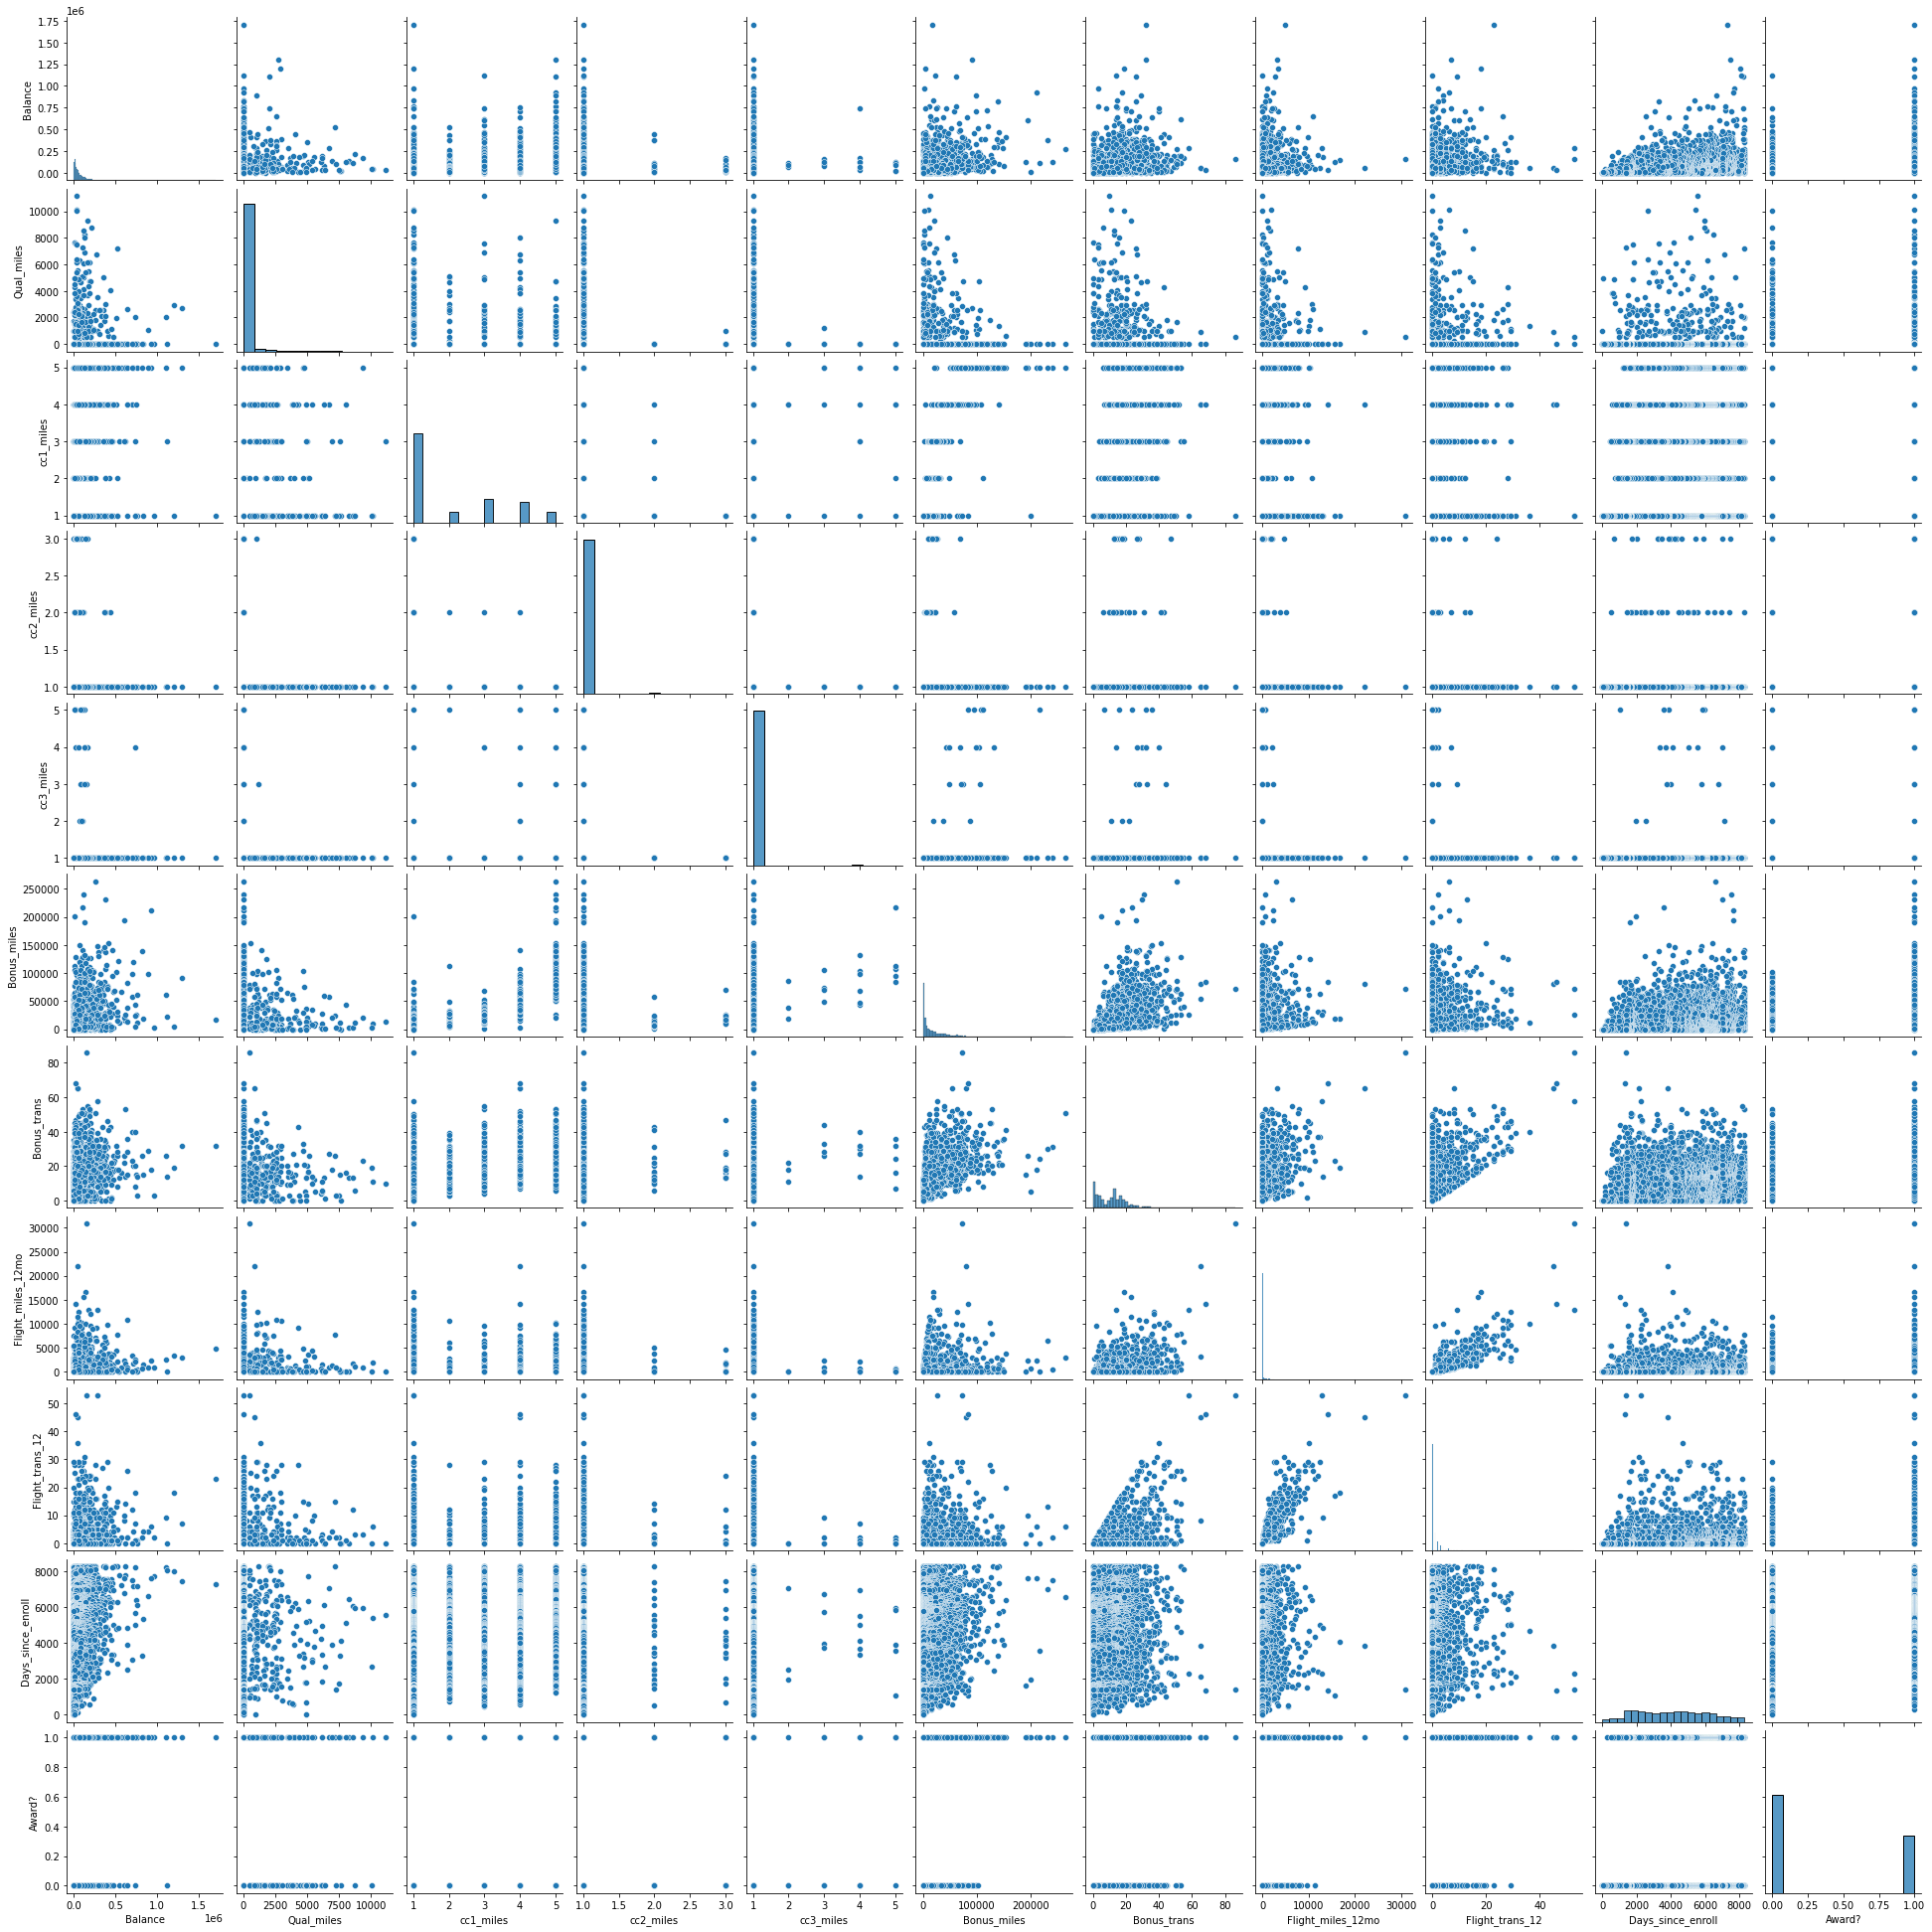

In [8]:
import seaborn as sns
# Create the default pairplot
sns.pairplot(airline2)

In [9]:
# Normalize heterogenous numerical data 
airline2_norm=pd.DataFrame(normalize(airline2),columns=airline2.columns)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


K-MEANS

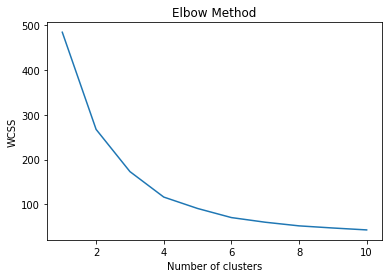

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airline2_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(airline2_norm)

KMeans(n_clusters=4, random_state=42)

In [12]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [13]:
#Assign clusters to the data set
airline2['cluster_Kmeans'] = clusters_new.labels_

In [14]:
#these are standardized values.
clusters_new.cluster_centers_

array([[9.82878899e-01, 3.71612347e-03, 4.15057209e-05, 3.77179195e-05,
        3.76205578e-05, 8.06914054e-02, 1.57453088e-04, 6.65079627e-03,
        2.12921781e-05, 1.03324885e-01, 4.81770304e-06],
       [8.99048678e-01, 2.03403471e-03, 5.68074076e-05, 3.01913199e-05,
        2.95156437e-05, 4.03089039e-01, 4.02398112e-04, 7.62262675e-03,
        2.24052643e-05, 8.50654942e-02, 9.73901648e-06],
       [5.23653977e-01, 2.37603195e-03, 9.13653056e-05, 4.56081254e-05,
        4.45095230e-05, 7.97866700e-01, 5.07019477e-04, 1.75075997e-02,
        5.89123100e-05, 1.31443994e-01, 3.00837174e-05],
       [6.28081328e-01, 9.30359261e-04, 2.06331617e-04, 2.06128767e-04,
        2.05879951e-04, 1.23980626e-01, 4.76413717e-04, 6.66146530e-03,
        2.24385615e-05, 6.89106611e-01, 2.58980762e-05]])

In [15]:
airline2.groupby('cluster_Kmeans').agg(['mean']).reset_index()

,cluster_Kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,88484.857577,175.062961,1.495441,1.008250,1.001737,8110.131568,8.770734,476.973079,1.439427,4060.013895,0.255319
1,1,72378.903670,119.606422,3.077982,1.024771,1.018349,31486.477982,17.476147,445.017431,1.317431,4044.253211,0.477064
2,2,28617.579670,112.000000,3.280220,1.030220,1.068681,42166.565934,17.634615,659.725275,1.909341,4229.689560,0.901099
3,3,5129.247934,8.285124,1.004132,1.004132,1.000000,891.388430,3.012397,66.466942,0.194215,4843.239669,0.185950


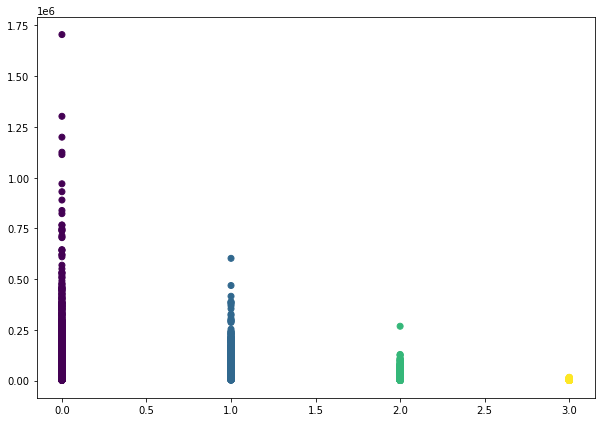

In [39]:

# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['cluster_Kmeans'],airline4['Balance'], c=clusters_new.labels_) 

In [40]:
# Cluster algorithm using K=5
clusters5=KMeans(5,random_state=30).fit(airline2_norm)
clusters5

KMeans(n_clusters=5, random_state=30)

In [41]:
clusters5.labels_

array([0, 3, 0, ..., 4, 0, 3])

In [42]:
# Assign clusters to the data set
airline5=airline2.copy()
airline5['clusters5id']=clusters5.labels_
airline5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_Kmeans,clusters5id
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,4
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [43]:
# Compute the centroids for K=5 clusters with 11 variables
clusters5.cluster_centers_

array([[9.87581993e-01, 3.39051837e-03, 3.51053916e-05, 3.03791237e-05,
        3.02652033e-05, 9.01709733e-02, 1.53701634e-04, 6.66013521e-03,
        2.09767345e-05, 7.53291184e-02, 3.94536689e-06],
       [5.14758999e-01, 2.45703304e-03, 9.55752981e-05, 5.00781670e-05,
        4.87710513e-05, 8.02358706e-01, 5.20472068e-04, 1.80244812e-02,
        6.06430623e-05, 1.36539353e-01, 3.06234744e-05],
       [4.14644791e-01, 1.30104261e-18, 2.28611980e-04, 2.27627266e-04,
        2.27627266e-04, 1.50766683e-01, 5.97513433e-04, 7.35401490e-03,
        2.84888383e-05, 8.48268382e-01, 3.91049405e-05],
       [8.93103634e-01, 4.45303855e-03, 1.23796982e-04, 1.23612826e-04,
        1.23612826e-04, 7.60122618e-02, 2.95169039e-04, 6.30476783e-03,
        2.07480658e-05, 4.07515394e-01, 1.35161631e-05],
       [8.91833807e-01, 2.00098101e-03, 5.80553278e-05, 3.01489923e-05,
        2.94377607e-05, 4.20637046e-01, 4.04859493e-04, 7.68892416e-03,
        2.27011475e-05, 8.30834166e-02, 1.00407121e-

In [44]:
# Group data by Clusters (K=5)
airline5.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_Kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,97404.121382,185.499533,1.604575,1.009337,1.001867,9636.360411,9.704015,520.399627,1.565359,3960.816060,0.269374,0.038282
1,1,27526.798295,115.818182,3.247159,1.034091,1.071023,41812.809659,17.599432,676.107955,1.951705,4226.252841,0.903409,2.008523
2,2,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225,3.000000
3,3,11768.858247,55.121134,1.005155,1.000000,1.000000,984.778351,3.469072,93.216495,0.293814,4908.760309,0.172680,1.033505
4,4,70743.739563,116.122266,3.135189,1.025845,1.019881,32531.393638,17.626243,442.855865,1.312127,4045.261431,0.491054,1.014911


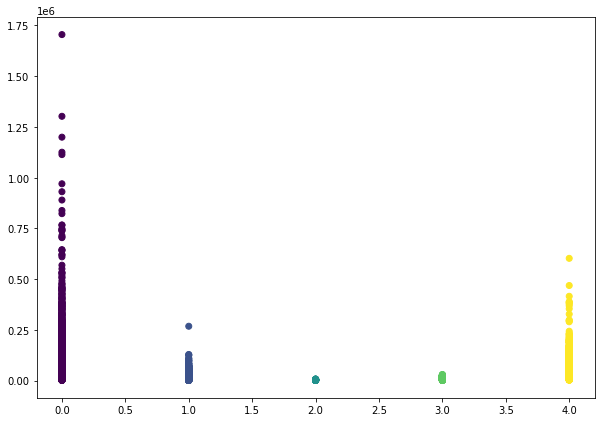

In [45]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline5['clusters5id'],airline5['Balance'], c=clusters5.labels_) 

HAC

In [17]:
airline3=airline.drop(['ID#'],axis=1)
airline3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
# Normalize heterogenous numerical data 
airline3_norm=pd.DataFrame(normalize(airline3),columns=airline3.columns)
airline3_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


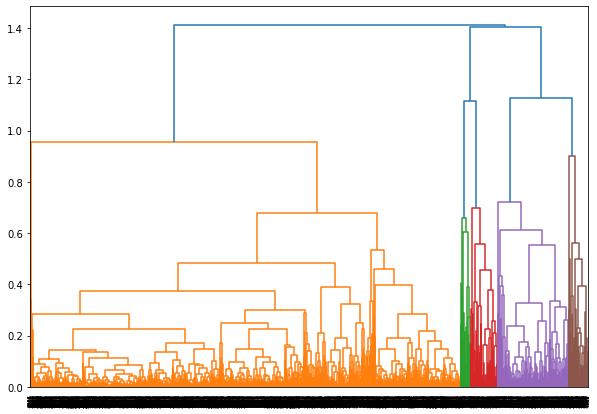

In [19]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(airline3_norm,'complete'))

In [21]:

# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [22]:
y=pd.DataFrame(hclusters.fit_predict(airline3_norm),columns=['clusterhac'])
y['clusterhac'].value_counts()

2    1547
4    1191
3     579
1     453
0     229
Name: clusterhac, dtype: int64

In [23]:
# Adding clusters to dataset
airline3['clusterhac']=hclusters.labels_
airline3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterhac
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [24]:
airline3.groupby('clusterhac').agg(['mean']).reset_index()

,clusterhac,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


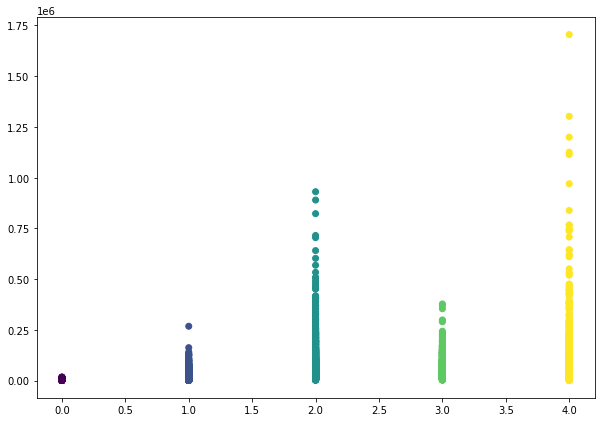

In [25]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline3['clusterhac'],airline3['Balance'], c=hclusters.labels_) 

DBSCAN

In [27]:
airline4=airline.drop(['ID#'],axis=1)
airline4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [28]:
airline4_norm=pd.DataFrame(normalize(airline4),columns=airline4.columns)
airline4_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [29]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(airline4_norm)

DBSCAN(eps=1, min_samples=4)

In [30]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
# Adding clusters to dataset
airline4['clusters_dbscan']=dbscan.labels_
airline4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_dbscan
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [46]:
airline4.groupby('clusters_dbscan').agg(['mean']).reset_index()

,clusters_dbscan,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,73601.327582,144.114529,2.059515,1.014504,1.012253,17144.846212,11.6019,460.055764,1.373593,4118.55939,0.370343


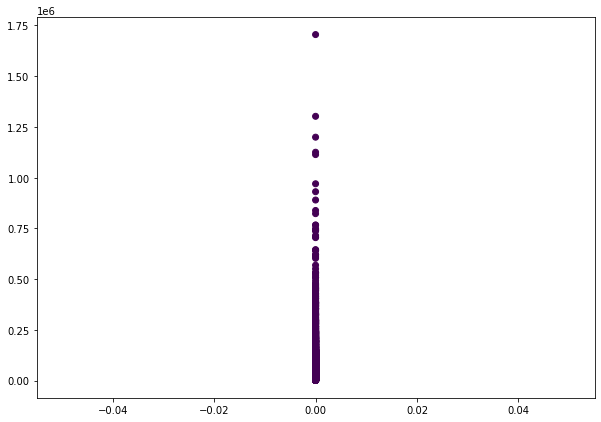

In [48]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline4['clusters_dbscan'],airline4['Balance'], c=dbscan.labels_) 